In [1]:
using Championetal2023, Plots

# Figure 3B

In [8]:
heights = [0.2, -0.06]
starts = [62.83185307179586, 1430]
durations = [100.0, 10.0]

thisdict = Dict([
        ("g_Na", 35.0), #mS/cm2
        ("g_K", 9.0), #mS/cm2
        ("g_L", 0.5), #mS/cm2
        ("E_Na", 55.0), #mV
        ("phi", 15.0),
        ("E_K", -90.0), #mV
        ("C_m", 0.333), #μF/cm2
        ("E_L", -65.0), #mV
        ("tau_syn", 150.0), #ms
        ("w_EE", 1.0 ), #mV
        ("spike_threshold", 0.0), # mV
        ("nnodes", 1),#number of network nodes
        ("simtype", :alltoall), #type of simulation

        ("noisesigma", 0.0),
        ("tau_n", 40), #ms
        ("gammasigma", 0.0),
        ("tau_n_gamma", 500), #
        ("omegasigma", 0.0),
        ("tau_n_omega", 500), #

        #params for oscillating regime:
        ("gamma_I_t", -0.5),#uA/cm2
        ("omega_I_t", 0.05),#1/ms
        ("g_syn", 5.5), #mS/cm2
        ("I_O", 3.515), #uA/cm2 
        
        ("inputalignment", false), #Use provided input start times without aligning to oscillation
        ("pulseheights", heights), #uA/cm2
        ("pulsestarts", starts), # ms
        ("pulsedurations", durations), # ms

        ("dt", 0.01),
        ("tmax", 2000),
        ("downsamplespacing", 1),

        ])

# For plotting window:
ptime_min = 1.0 
ptime_max = 2.0
pidxs = round(Int, ptime_min*1000/(thisdict["dt"]*thisdict["downsamplespacing"])):round(Int, ptime_max*1000/(thisdict["dt"]*thisdict["downsamplespacing"]))
spikeperturbationplot = plot(legend=false, size = (450,150), grid=false, xlabel="Time (sec)", ylabel="V")


@time tvals1, sim1 = oscintegrator_sim(thisdict)

plot!(  spikeperturbationplot, 
        tvals1.t_vect[pidxs]/1000, 
        sim1.v_vect[pidxs],
        c = :orange,
        linewidth=2.0
)

thisdict["pulseheights"] = [0.2, 0.06]
thisdict["pulsestarts"] = [62.83185307179586, 1415+10]

@time tvals2, sim2 = oscintegrator_sim(thisdict)

plot!(  spikeperturbationplot, 
        tvals2.t_vect[pidxs]/1000, 
        sim2.v_vect[pidxs],
        c = :red,
        linewidth=2.0
)

thisdict["pulseheights"] = [0.2, 0.0]

@time tvals3, sim3 = oscintegrator_sim(thisdict)

plot!(  spikeperturbationplot, 
        tvals3.t_vect[pidxs]/1000, 
        sim3.v_vect[pidxs],
        c = :blue,
        linewidth=2.0
)

plot(spikeperturbationplot)

  0.818989 seconds (35.00 M allocations: 543.195 MiB, 6.32% gc time)
  0.853715 seconds (35.00 M allocations: 543.195 MiB, 5.60% gc time)
  0.834911 seconds (35.00 M allocations: 543.195 MiB, 6.00% gc time)


# Figure 3C

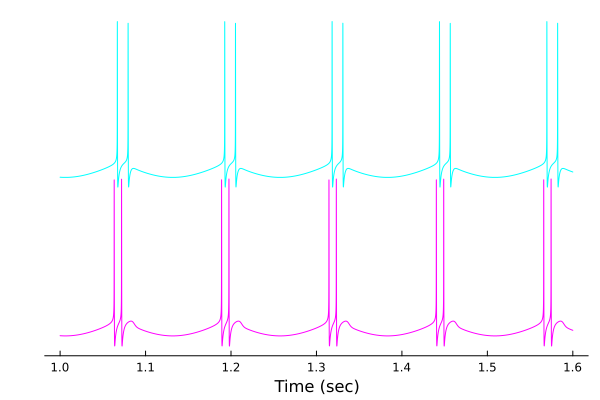

In [11]:
using StatsBase, SparseArrays, Statistics

sval_vect = [0.012, 0.019]
thisdict = Dict([
        ("g_Na", 35.0), #mS/cm2
        ("g_K", 9.0), #mS/cm2
        ("g_L", 0.5), #mS/cm2
        ("E_Na", 55.0), #mV
        ("phi", 15.0),
        ("E_K", -90.0), #mV
        ("C_m", 0.333), #μF/cm2
        ("E_L", -65.0), #mV
        ("tau_syn", 150.0), #ms
        ("w_EE", 1.0), #mV
        ("spike_threshold", 0.0), # mV
        ("nnodes", 1), #number of network nodes
        ("simtype", :alltoall), #type of simulation

        ("noisesigma", 0.0),
        ("tau_n", 5), #ms

        ("gamma_I_t", -0.5), #uA/cm2
        ("omega_I_t", 0.05), #  #1/ms
        ("g_syn", 5.5), #mS/cm2
        ("I_O", 3.515),

        ("dt", 0.01),
        ("tmax", 2000),
        ("downsamplespacing", 1),
        ]
)


splot = plot(legend=false, grid=false, xlabel="Time (sec)")
scolors = [:cyan, :magenta]
soffset = [65.0, 0.0]
ptime_min = 1.0 
ptime_max = 1.6 
for (sidx,sval) in enumerate(sval_vect)
        thisdict["I_syn"] = sval
        tvals, sim = oscintegrator_stdystate(thisdict)

        pidxs = round(Int, ptime_min*1000/(thisdict["dt"]*thisdict["downsamplespacing"])):round(Int, ptime_max*1000/(thisdict["dt"]*thisdict["downsamplespacing"]))

        plot!(splot, tvals.plot_t_vect[pidxs]/1000, sim.v_vect[pidxs] .+ soffset[sidx], color=scolors[sidx], yaxis=false)

end
plot(splot)